In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns




In [4]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telecom_cust.shape

(7043, 21)

In [8]:
telecom_cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set

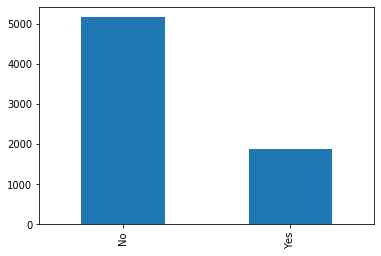

In [12]:
telecom_cust.Churn.value_counts().plot.bar()

In [13]:
df_new=telecom_cust[["tenure", "OnlineSecurity", "Contract", "TotalCharges", "InternetService", "TechSupport", "MonthlyCharges", "Churn" ]]

In [14]:
df_new.head()

,tenure,OnlineSecurity,Contract,TotalCharges,InternetService,TechSupport,MonthlyCharges,Churn
0,1,No,Month-to-month,29.85,DSL,No,29.85,No
1,34,Yes,One year,1889.50,DSL,No,56.95,No
2,2,Yes,Month-to-month,108.15,DSL,No,53.85,Yes
3,45,Yes,One year,1840.75,DSL,Yes,42.30,No
4,2,No,Month-to-month,151.65,Fiber optic,No,70.70,Yes


In [15]:
df_new.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df_new.describe()

,tenure,TotalCharges,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,2283.300441,64.798208
std,24.545260,2266.771362,30.085974
min,1.000000,18.800000,18.250000
25%,9.000000,401.450000,35.587500
50%,29.000000,1397.475000,70.350000
75%,55.000000,3794.737500,89.862500
max,72.000000,8684.800000,118.750000


In [17]:
df_new.isnull().sum().any()

False

In [18]:
df_new['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_new['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [19]:
df_new.head()

,tenure,OnlineSecurity,Contract,TotalCharges,InternetService,TechSupport,MonthlyCharges,Churn
0,1,No,Month-to-month,29.85,DSL,No,29.85,0
1,34,Yes,One year,1889.50,DSL,No,56.95,0
2,2,Yes,Month-to-month,108.15,DSL,No,53.85,1
3,45,Yes,One year,1840.75,DSL,Yes,42.30,0
4,2,No,Month-to-month,151.65,Fiber optic,No,70.70,1


In [20]:
df_new_2 = pd.get_dummies(df_new)
df_new_2.head()

,tenure,TotalCharges,MonthlyCharges,Churn,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,29.85,29.85,0,1,0,0,1,0,0,1,0,0,1,0,0
1,34,1889.50,56.95,0,0,0,1,0,1,0,1,0,0,1,0,0
2,2,108.15,53.85,1,0,0,1,1,0,0,1,0,0,1,0,0
3,45,1840.75,42.30,0,0,0,1,0,1,0,1,0,0,0,0,1
4,2,151.65,70.70,1,1,0,0,1,0,0,0,1,0,1,0,0


In [21]:
df_new_2.shape

(7032, 16)

In [22]:
y = df_new_2['Churn'].values
X = df_new_2.drop(columns = ['Churn'])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
from sklearn import metrics
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8061611374407583


In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,prediction_test))  
print(classification_report(y_test,prediction_test))

[[1441  139]
 [ 270  260]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1580
           1       0.65      0.49      0.56       530

    accuracy                           0.81      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.81      0.80      2110



In [26]:
pip install smote

Note: you may need to restart the kernel to use updated packages.


In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE()
x_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

#sns.countplot(x=y_train_s, data=df, palette='CMRmap')

In [29]:
X_smote = pd.DataFrame(x_train_s)
y_smote = pd.DataFrame(y_train_s)

# define training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model.fit(X_train, y_train)

# Make predictions
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8319386331938633


[[568 135]
 [106 625]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       703
           1       0.82      0.85      0.84       731

    accuracy                           0.83      1434
   macro avg       0.83      0.83      0.83      1434
weighted avg       0.83      0.83      0.83      1434



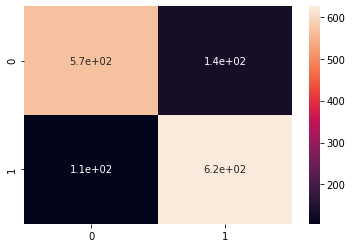

In [47]:
from sklearn.metrics import classification_report, confusion_matrix  
confusion_matrix = confusion_matrix(y_test,prediction_test)
print(confusion_matrix)  
print(classification_report(y_test,prediction_test))

sns.heatmap(confusion_matrix, annot=True)

In [32]:
import pickle
pickle.dump(model, open("smote_rf_model", 'wb'))  

In [33]:
my_dict = {"tenure" :2, 
        "OnlineSecurity":1, 
        "Contract": "Month-to-month", 
        "TotalCharges": 108 , 
        "InternetService": "DSL", 
        "TechSupport": "No", 
        "MonthlyCharges":50
}

In [34]:
pickle.dump(list(X.columns), open('model_features.pkl','wb'))

In [35]:
df = pd.DataFrame.from_dict([my_dict], orient='columns')

In [36]:
df.head()

,tenure,OnlineSecurity,Contract,TotalCharges,InternetService,TechSupport,MonthlyCharges
0,2,1,Month-to-month,108,DSL,No,50


In [37]:
features = pickle.load(open('model_features.pkl', 'rb'))

In [38]:
print(features)

['tenure', 'TotalCharges', 'MonthlyCharges', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes']


In [39]:
df = pd.get_dummies(df).reindex(columns=features, fill_value=0)

In [40]:
df.head()

,tenure,TotalCharges,MonthlyCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,2,108,50,0,0,0,1,0,0,1,0,0,1,0,0


In [41]:
prediction = model.predict(df)

In [42]:
print(prediction)

[1]


In [43]:
prediction = int(round(model.predict_proba(X)[0][1], 2)*100)

In [44]:
print("%", prediction)

% 78
